# Exercise 06.05

## Problem:

**[Purpose: To get hands on experience with the goal of predicting the next datum, and to see how the prior influences that prediction.]**

(A) Suppose you have a coin that you know is minted by the government and has not been tampered with. Therefore you have a strong prior belief that the coin is fair. You flip the coin 10 times and get 9 heads. What is your predicted probability of heads for the 11th flip? Explain your answer carefully; justify your choice of prior.

(B) Now you have a different coin, this one made of some strange material and marked (in fine print) “Patent Pending, International Magic, Inc.” You flip the coin 10 times and get 9 heads. What is your predicted probability of heads for the 11th flip? Explain your answer carefully; justify your choice of prior. Hint: Use the prior from Exercise 6.4.

## Solution:

Source utilities:

In [1]:
source("../DBDA2Eprograms/DBDA2E-utilities.R")


*********************************************************************
Kruschke, J. K. (2015). Doing Bayesian Data Analysis, Second Edition:
A Tutorial with R, JAGS, and Stan. Academic Press / Elsevier.
*********************************************************************



Loading required package: coda
Linked to JAGS 4.1.0
Loaded modules: basemod,bugs


Source `BernBeta.R`:

In [2]:
source("../DBDA2Eprograms/BernBeta.R")

#### A.

My prior is that coin is fair, so I place a lot of emphasis near the 0.5 region:

In [7]:
priorFairCoin = c(100, 100)

Create my data:

In [11]:
data = c(rep(1, 9), rep(0, 1))

Generate the posterior:

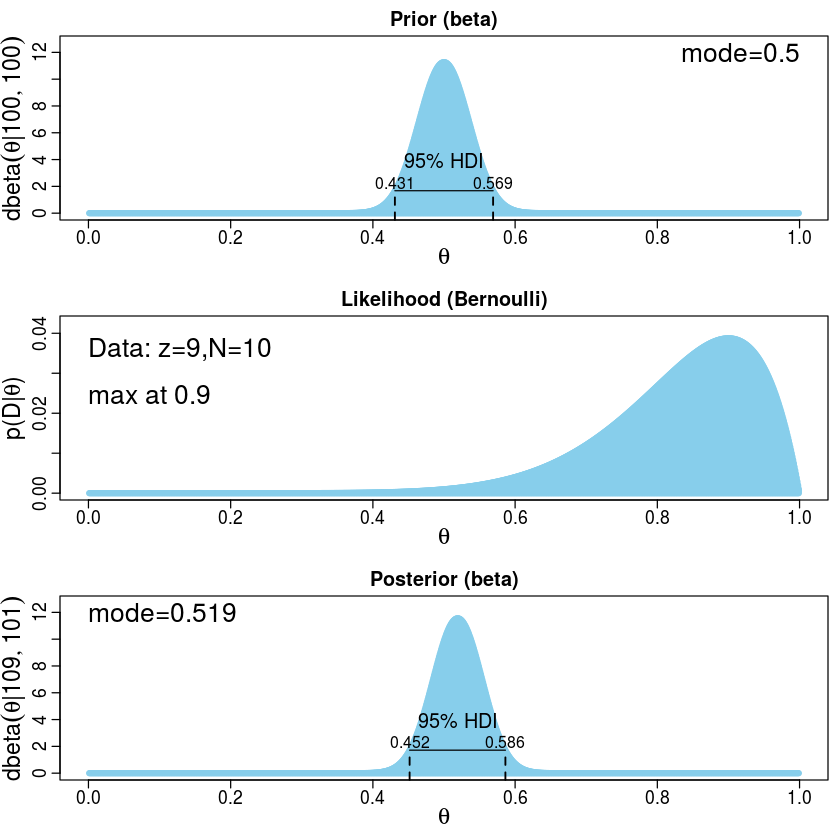

In [12]:
posteriorFairCoin = BernBeta(priorFairCoin, data, showCentTend = "Mode", showHDI = TRUE)

While I get 9 Heads out of 10 flips, my prior belief is so strong that I am attributing the observed frequency to chance. My posterior does not shift very much from a mode of 0.5 as a result. I am still under the belief that the coin is fair, though my certainty has dropped a little bit. My predicted probability of Heads for the 11th coin flip then still is around 0.5.

#### B.

I know that this coin is supposed to be unique, but I have no knowledge about its bias towards one side. The coin could be equally weighted, weighted towards Tails, or weighted towards Heads. To express this uncertainty, I choose a uniform prior:

In [10]:
priorUnknownCoin = c(1, 1)

I use the same data as before to generate my posterior:

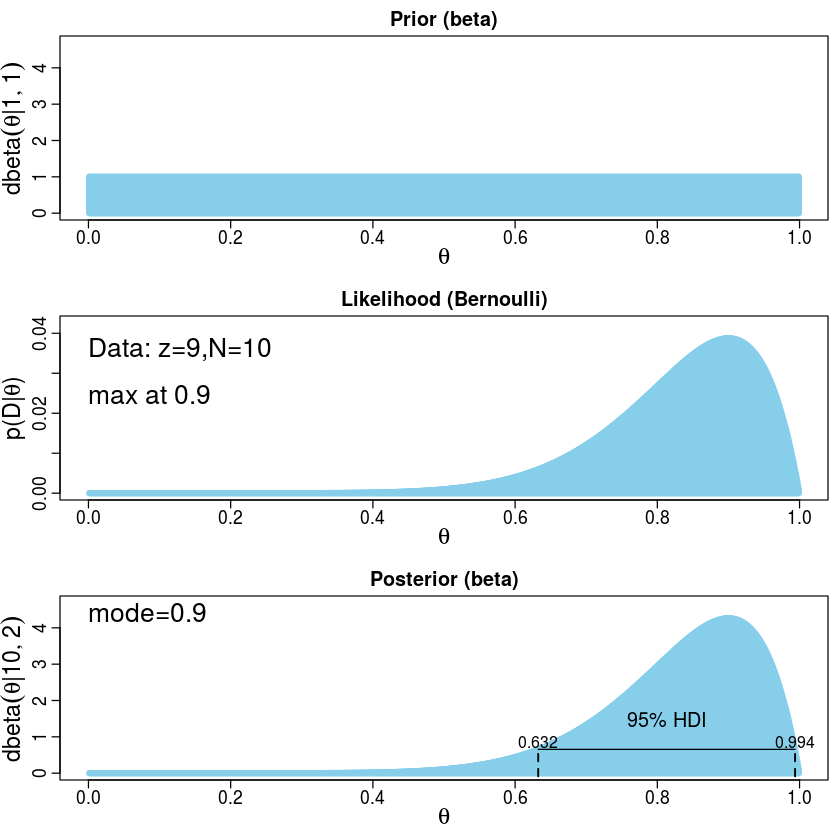

In [13]:
posteriorUnknownCoin = BernBeta(priorUnknownCoin, data, showCentTend = "Mode", showHDI = TRUE)

This time, the coin has strongly influenced my beliefs. I flipped 9/10 Heads, suggesting that this coin is weighted to Heads. My posterior HDI supports this notion, ranging towards higher probability values with a mode of 0.9. I predict that the 11th coin flip will result in Heads.